<a href="https://colab.research.google.com/github/annefrancine/Action-and-Gesture-Recognition/blob/master/body_joint_coordinates_(keypoints).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the package


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
cv2.__version__

'4.1.2'

# Connecting the drive and accessing the files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pose_path = '/content/drive/My Drive/pose'

In [0]:
imagens_path = '/content/drive/My Drive/imagens'

# Accessing pre-trained neural network

In [0]:
arquivo_proto = '/content/drive/My Drive/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/drive/My Drive/pose/body/mpi/pose_iter_160000.caffemodel'

In [0]:
number_points = 15
pairs_points = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7],[1,14],
               [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

In [7]:
pairs_points

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [0]:
cor_ponto, cor_linha = (255, 128, 0), (7, 62, 248)

# Loading an image of the drive

In [0]:
image = cv2.imread('/content/drive/My Drive/imagens/body/single/single_3.jpg')

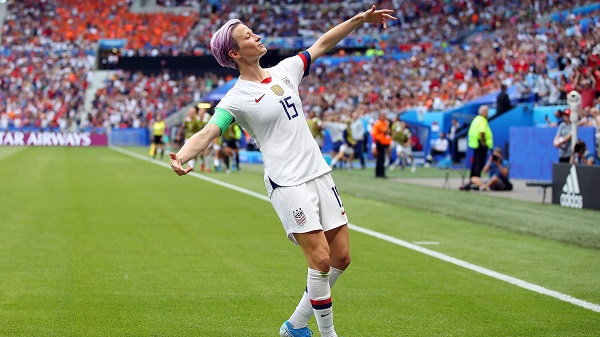

In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
copy_image= np.copy(image)

In [0]:
image_width = image.shape[1]# imagem_largura
image_height   = image.shape[0]# imagem_altura

In [13]:
image_width , image_height

(600, 337)

# Read the model loaded in Step 3

In [0]:
model = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

# Define the dimensions of the input image

In [0]:
height_input = 368
with_input = int((height_input / image_height) * image_width)

In [16]:
with_input 

655

# Convert the image from openCV to Caffe blob format

In [0]:
blob_input = cv2.dnn.blobFromImage(image, 1.0 / 255, 
                                    (with_input, height_input), 
                                    (0, 0, 0), swapRB = False, crop = False)

# Output

In [0]:
model.setInput(blob_input)
output = model.forward()

In [19]:
output.shape

(1, 44, 46, 82)

In [0]:
height = output.shape[2]
width = output.shape[3]

In [21]:
height,width

(46, 82)

# Plotting the outputs in the image

In [0]:
points = []
limit = 0.1
for i in range(number_points):
  mapa_confianca = output[0, i, :, :]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
  #print(confianca)
  #print(ponto)
  
  x = (image_width * ponto[0]) / width
  y = (image_height * ponto[1] / height)
  
  if confianca > limit:
    cv2.circle(copy_image, (int(x), int(y)), 8, cor_ponto, thickness = -1, 
               lineType=cv2.FILLED)
    cv2.putText(copy_image, "{}".format(i), (int(x), int(y)), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, 
                lineType=cv2.LINE_AA)
    points.append((int(x), int(y)))
  else:
    points.append(None)

In [25]:
len(points)

15

In [26]:
points

[(226, 21),
 (248, 65),
 (226, 95),
 (204, 131),
 (175, 153),
 (278, 65),
 (314, 43),
 (358, 14),
 (285, 183),
 (314, 256),
 (321, 329),
 (314, 168),
 (336, 256),
 (292, 315),
 (278, 124)]

# Creating a mask for skeleton drawing

In [0]:
size = cv2.resize(image, (image_width, image_height))
mapa_suave = cv2.GaussianBlur(size, (3,3), 0, 0)
mascara_mapa = np.uint8(mapa_suave > limit)

# Draw the skeleton

In [0]:
for par in pairs_points:
  #print(par)
  partA = par[0]
  partB = par[1]
  
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], cor_linha, 3)
    cv2.circle(image, points[partA], 8, cor_ponto, thickness = -1,
              lineType = cv2.LINE_AA)
    
    cv2.line(mascara_mapa, points[partA], points[partB], cor_linha, 3)
    cv2.circle(mascara_mapa, points[partA], 8, cor_ponto, thickness = -1,
              lineType = cv2.LINE_AA)

# Displaying the outputs

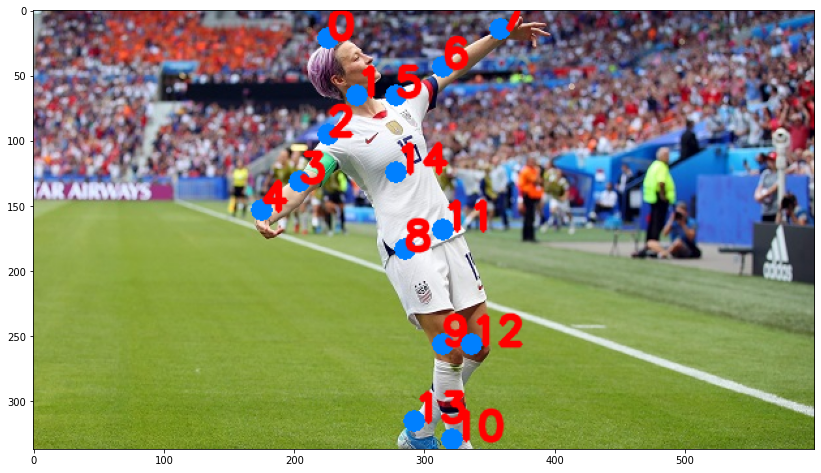

In [32]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB));

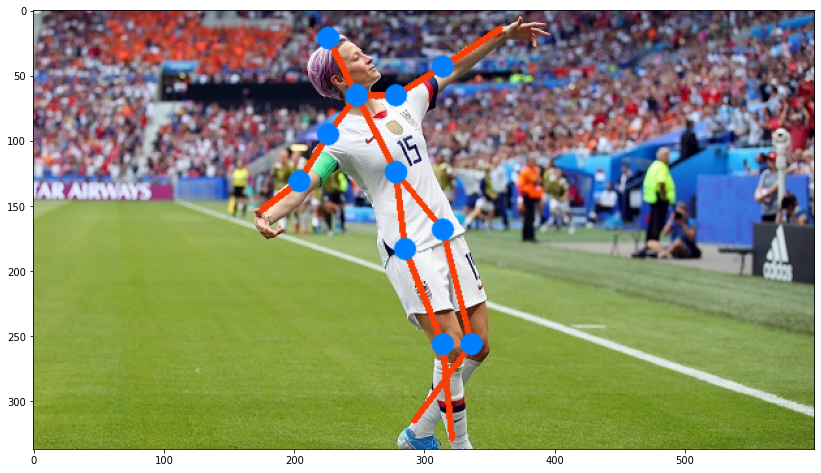

In [33]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

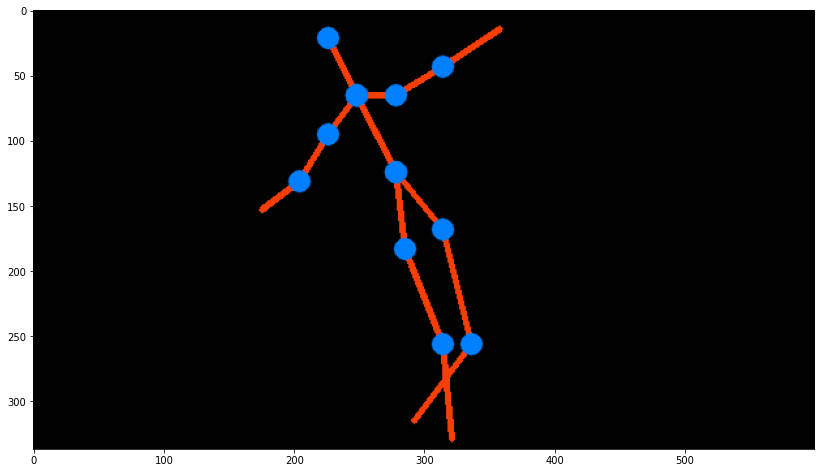

In [35]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(mascara_mapa, cv2.COLOR_BGR2RGB));